In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import torch
sys.path.append("/Users/mitchellostrow/Desktop/Projects/NN_delays/nn_delay_embeddings")
from src.models import S4,RNN
from src.metrics import compute_dynamic_quantities
from dysts.flows import Lorenz

%load_ext autoreload
%autoreload 2


/Users/mitchellostrow/opt/anaconda3/envs/nn_delays/lib/python3.12/site-packages/dysts/analysis.py:14: UserWarning: Neurokit2 must be installed before computing multiscale entropy
  warnings.warn("Neurokit2 must be installed before computing multiscale entropy")


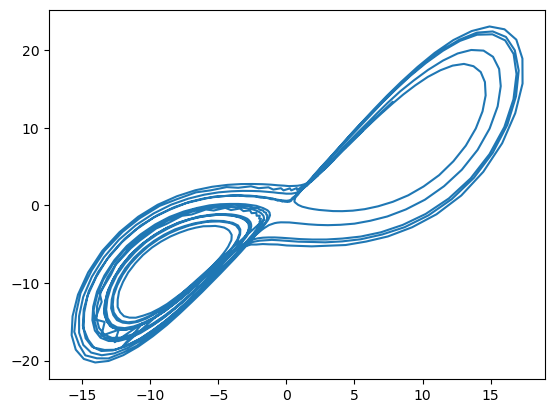

In [27]:
## Load and simulate an attractor
attractor = Lorenz()
sol = attractor.make_trajectory(1000, resample=True,noise=0.01)
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

In [30]:
dim = 10
# model = RNN(1,1,'LSTM',d_model=dim,activation='tanh')
model = S4(1,1,1,10)
model.eval()

s = torch.tensor(sol[:-1,0:1].reshape(1,-1,1),dtype=torch.float32)
print(s.shape)
y,x = model(s)
x.shape,y.shape

torch.Size([1, 999, 1])


(torch.Size([1, 1, 10, 999]), torch.Size([1, 999, 1]))

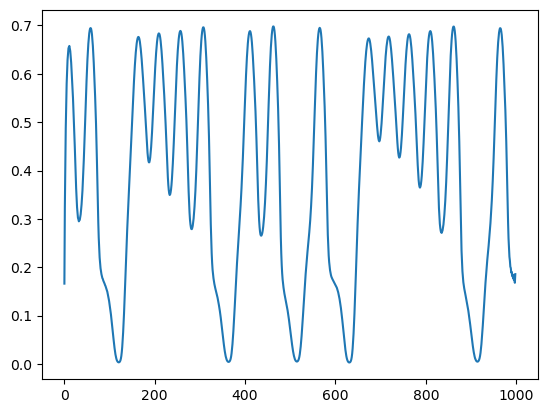

In [6]:
plt.plot(x.detach().numpy().squeeze()[:,0])

In [32]:
sys.path.append("/Users/mitchellostrow/Desktop/Projects/NN_delays/nn_delay_embeddings/notebooks/")
from utils import train,make_dataset

In [28]:
train_loader, val_loader, train_data, val_data = make_dataset(Lorenz,1000,10)   
train_data.shape

(10, 1000, 3) torch.Size([10, 1000, 1])
(10, 1000, 3) torch.Size([10, 1000, 1])


(10, 1000, 3)

In [31]:
from torch.optim import AdamW
import torch.nn as nn
num_steps = 100

model, train_loss, val_loss = train(model, train_loader, val_loader, 50, 1e-2,AdamW, nn.MSELoss(), 'cpu',num_steps)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0 Training Loss: 65.7109245300293


  2%|▏         | 1/50 [00:07<06:11,  7.57s/it]

Epoch 0 Validation Loss: 67.55554084777832
Epoch 1 Training Loss: 65.32169761657715


  4%|▍         | 2/50 [00:15<06:11,  7.74s/it]

Epoch 1 Validation Loss: 66.87601737976074
Epoch 2 Training Loss: 64.94896659851074


  6%|▌         | 3/50 [00:24<06:39,  8.50s/it]

Epoch 2 Validation Loss: 66.30738487243653
Epoch 3 Training Loss: 64.73786735534668


  8%|▊         | 4/50 [00:32<06:08,  8.02s/it]

Epoch 3 Validation Loss: 65.67711524963379
Epoch 4 Training Loss: 64.296431350708


 10%|█         | 5/50 [00:38<05:40,  7.56s/it]

Epoch 4 Validation Loss: 65.3813690185547
Epoch 5 Training Loss: 64.13851509094238


 12%|█▏        | 6/50 [00:45<05:24,  7.38s/it]

Epoch 5 Validation Loss: 65.02139587402344
Epoch 6 Training Loss: 63.972503662109375


 14%|█▍        | 7/50 [00:53<05:21,  7.48s/it]

Epoch 6 Validation Loss: 64.65368270874023
Epoch 7 Training Loss: 63.7605899810791


 16%|█▌        | 8/50 [01:01<05:23,  7.70s/it]

Epoch 7 Validation Loss: 64.33128433227539
Epoch 8 Training Loss: 63.7074577331543


 18%|█▊        | 9/50 [01:09<05:20,  7.82s/it]

Epoch 8 Validation Loss: 63.91954727172852
Epoch 9 Training Loss: 63.50877151489258


 20%|██        | 10/50 [01:17<05:12,  7.82s/it]

Epoch 9 Validation Loss: 63.59079551696777
Epoch 10 Training Loss: 63.34276809692383


 22%|██▏       | 11/50 [01:24<04:59,  7.67s/it]

Epoch 10 Validation Loss: 63.3649715423584
Epoch 11 Training Loss: 63.23384437561035


 24%|██▍       | 12/50 [01:33<04:56,  7.80s/it]

Epoch 11 Validation Loss: 63.27988624572754
Epoch 12 Training Loss: 63.1727855682373


 26%|██▌       | 13/50 [01:41<04:55,  7.99s/it]

Epoch 12 Validation Loss: 63.126251220703125
Epoch 13 Training Loss: 63.133170700073244


 28%|██▊       | 14/50 [01:49<04:49,  8.03s/it]

Epoch 13 Validation Loss: 62.87061042785645
Epoch 14 Training Loss: 63.18565788269043


 30%|███       | 15/50 [01:57<04:41,  8.05s/it]

Epoch 14 Validation Loss: 62.55893402099609
Epoch 15 Training Loss: 62.998905181884766


 32%|███▏      | 16/50 [02:05<04:31,  7.99s/it]

Epoch 15 Validation Loss: 62.51024742126465
Epoch 16 Training Loss: 63.00600929260254


 34%|███▍      | 17/50 [02:13<04:20,  7.89s/it]

Epoch 16 Validation Loss: 62.41967353820801
Epoch 17 Training Loss: 63.05141944885254


 36%|███▌      | 18/50 [02:21<04:14,  7.96s/it]

Epoch 17 Validation Loss: 62.237755966186526
Epoch 18 Training Loss: 62.943856430053714


 38%|███▊      | 19/50 [02:29<04:09,  8.05s/it]

Epoch 18 Validation Loss: 62.29014625549316
Epoch 19 Training Loss: 62.93415412902832


 40%|████      | 20/50 [02:37<04:03,  8.11s/it]

Epoch 19 Validation Loss: 62.21851081848145
Epoch 20 Training Loss: 62.92467002868652


 42%|████▏     | 21/50 [02:46<03:56,  8.14s/it]

Epoch 20 Validation Loss: 62.154124069213864
Epoch 21 Training Loss: 62.91970443725586


 44%|████▍     | 22/50 [02:53<03:45,  8.05s/it]

Epoch 21 Validation Loss: 62.107758331298825
Epoch 22 Training Loss: 62.928551483154294


 46%|████▌     | 23/50 [03:01<03:36,  8.02s/it]

Epoch 22 Validation Loss: 62.12341537475586
Epoch 23 Training Loss: 62.90551490783692


 48%|████▊     | 24/50 [03:09<03:28,  8.03s/it]

Epoch 23 Validation Loss: 62.0924430847168
Epoch 24 Training Loss: 62.92385673522949


 50%|█████     | 25/50 [03:18<03:22,  8.09s/it]

Epoch 24 Validation Loss: 62.07213706970215
Epoch 25 Training Loss: 62.94975242614746


 52%|█████▏    | 26/50 [03:25<03:11,  7.99s/it]

Epoch 25 Validation Loss: 61.967139434814456
Epoch 26 Training Loss: 62.89332313537598


 54%|█████▍    | 27/50 [03:33<03:00,  7.84s/it]

Epoch 26 Validation Loss: 61.99050674438477
Epoch 27 Training Loss: 62.95258979797363


 56%|█████▌    | 28/50 [03:41<02:55,  7.96s/it]

Epoch 27 Validation Loss: 62.052040100097656
Epoch 28 Training Loss: 62.96613693237305


 58%|█████▊    | 29/50 [03:49<02:46,  7.91s/it]

Epoch 28 Validation Loss: 61.93070831298828
Epoch 29 Training Loss: 62.890593719482425


 60%|██████    | 30/50 [03:57<02:38,  7.92s/it]

Epoch 29 Validation Loss: 61.90940055847168
Epoch 30 Training Loss: 62.92178916931152


 62%|██████▏   | 31/50 [04:05<02:29,  7.88s/it]

Epoch 30 Validation Loss: 61.89688720703125
Epoch 31 Training Loss: 62.90730857849121


 64%|██████▍   | 32/50 [04:12<02:20,  7.81s/it]

Epoch 31 Validation Loss: 61.95975036621094
Epoch 32 Training Loss: 62.90253601074219


 66%|██████▌   | 33/50 [04:20<02:12,  7.78s/it]

Epoch 32 Validation Loss: 62.000675964355466
Epoch 33 Training Loss: 62.91346817016601


 68%|██████▊   | 34/50 [04:27<02:02,  7.66s/it]

Epoch 33 Validation Loss: 62.01698303222656
Epoch 34 Training Loss: 62.89342269897461


 70%|███████   | 35/50 [04:35<01:55,  7.72s/it]

Epoch 34 Validation Loss: 61.996897506713864
Epoch 35 Training Loss: 62.88644180297852


 72%|███████▏  | 36/50 [04:43<01:48,  7.72s/it]

Epoch 35 Validation Loss: 61.949072265625
Epoch 36 Training Loss: 62.92192192077637


 74%|███████▍  | 37/50 [04:50<01:39,  7.64s/it]

Epoch 36 Validation Loss: 61.90799140930176
Epoch 37 Training Loss: 62.92188262939453


 76%|███████▌  | 38/50 [04:58<01:31,  7.61s/it]

Epoch 37 Validation Loss: 61.96315994262695
Epoch 38 Training Loss: 62.903852462768555


 78%|███████▊  | 39/50 [05:06<01:23,  7.61s/it]

Epoch 38 Validation Loss: 61.935403442382814
Epoch 39 Training Loss: 62.89905204772949


 80%|████████  | 40/50 [05:13<01:15,  7.58s/it]

Epoch 39 Validation Loss: 61.876692581176755
Epoch 40 Training Loss: 62.92362823486328


 82%|████████▏ | 41/50 [05:21<01:07,  7.55s/it]

Epoch 40 Validation Loss: 61.943671798706056
Epoch 41 Training Loss: 62.920663833618164


 84%|████████▍ | 42/50 [05:28<01:01,  7.63s/it]

Epoch 41 Validation Loss: 61.93759613037109
Epoch 42 Training Loss: 62.93564414978027


 86%|████████▌ | 43/50 [05:36<00:53,  7.64s/it]

Epoch 42 Validation Loss: 61.86369705200195
Epoch 43 Training Loss: 62.88261375427246


 88%|████████▊ | 44/50 [05:44<00:45,  7.64s/it]

Epoch 43 Validation Loss: 61.86681442260742
Epoch 44 Training Loss: 62.96114540100098


 90%|█████████ | 45/50 [05:52<00:38,  7.75s/it]

Epoch 44 Validation Loss: 61.9530532836914
Epoch 45 Training Loss: 62.900956344604495


 92%|█████████▏| 46/50 [05:59<00:30,  7.73s/it]

Epoch 45 Validation Loss: 61.90746726989746
Epoch 46 Training Loss: 62.90085067749023


 94%|█████████▍| 47/50 [06:07<00:23,  7.81s/it]

Epoch 46 Validation Loss: 61.86048889160156
Epoch 47 Training Loss: 62.89038238525391


 96%|█████████▌| 48/50 [06:15<00:15,  7.78s/it]

Epoch 47 Validation Loss: 61.886832046508786
Epoch 48 Training Loss: 62.943807983398436


 98%|█████████▊| 49/50 [06:23<00:07,  7.79s/it]

Epoch 48 Validation Loss: 61.95631484985351
Epoch 49 Training Loss: 62.89441680908203


100%|██████████| 50/50 [06:31<00:00,  7.82s/it]

Epoch 49 Validation Loss: 61.947135543823244


In [33]:
lorenz_stats, model_stats = compute_dynamic_quantities(model,attractor,1000,1)

getting lyapunov exponents
> /Users/mitchellostrow/Desktop/Projects/NN_delays/nn_delay_embeddings/src/metrics.py(291)compute_LE_model()
    290                 import ipdb; ipdb.set_trace()
--> 291                 lyap, cutoff_index = calc_lyap(h1,h2,eps_max * 1e3,tvals)
    292                 all_lyap_model.append(lyap)

ValueError: Inputs must not be empty.
> /Users/mitchellostrow/Desktop/Projects/NN_delays/nn_delay_embeddings/src/metrics.py(291)compute_LE_model()
    290                 import ipdb; ipdb.set_trace()
--> 291                 lyap, cutoff_index = calc_lyap(h1,h2,eps_max * 1e3,tvals)
    292                 all_lyap_model.append(lyap)

--Return--
None
> /Users/mitchellostrow/Desktop/Projects/NN_delays/nn_delay_embeddings/src/metrics.py(291)compute_LE_model()
    290                 import ipdb; ipdb.set_trace()
--> 291                 lyap, cutoff_index = calc_lyap(h1,h2,eps_max * 1e3,tvals)
    292                 all_lyap_model.append(lyap)

array([[ 0.0230927 +2.858

ValueError: Inputs must not be empty.